In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import seaborn as sns
from scipy.stats import kstest
from statsmodels.stats.diagnostic import het_breuschpagan

# Glimpse of the Data

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
description = df.describe(include='all')
dimension = df.shape
info = df.info()

description, dimension

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(                age   sex          bmi     children smoker     region  \
 count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
 unique          NaN     2          NaN          NaN      2          4   
 top             NaN  male          NaN          NaN     no  southeast   
 freq            NaN   676          NaN          NaN   1064        364   
 mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
 std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
 min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
 25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
 50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
 75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
 max       64.000000   NaN    53.130000     5.000000    NaN        NaN   
 
              charges  
 count    1338.000000  
 unique           NaN  
 top              NaN  
 freq         

Resource: The dataset is derived from the book "Machine Learning with R" by Brett Lantz.
Dimension: The dataset has 1338 rows (observations) and 7 columns (variables).

Variable Description:
1. age: Age of the primary beneficiary. It has a range from 18 to 64 years with an average age of approximately 39.2 years.
2. sex: Insurance contractor gender. It has two categories: male and female. There are 676 males in the dataset.
3. bmi: Body Mass Index (BMI). It's an objective index of body weight (kg / m^2) using the ratio of height to weight. The average BMI in the dataset is approximately 30.66 with a range from 15.96 to 53.13.
children: Number of children covered by health insurance / Number of dependents. The range is from 0 to 5 children, with an average of approximately 1.1 children.
4. smoker: Indicates whether the individual is a smoker or not. It has two categories: yes and no. There are 1064 non-smokers in the dataset.
5. region: The beneficiary's residential area in the US. It has four categories: northeast, southeast, southwest, and northwest. The southeast region has the highest number of observations with 364.
6. charges: Individual medical costs billed by health insurance. The average charge in the dataset is approximately $13,270.42 with a range from $1,121.87 to $63,770.43.

## Statement of Research:

Given the dataset, the research objective is to develop a predictive model that can accurately estimate the individual medical costs (charges) based on the following predictors: age, sex, BMI, number of children, smoking status, and region of residence. This predictive model will be beneficial for health insurance companies to determine the medical cost for an individual based on their health profile and demographics. The model will:

1. Help the insurance companies to identify the key factors that drive the medical costs. 
2. Be useful for insurance companies to develop appropriate insurance plans for their customers. 
3. Be useful for individuals to estimate their medical costs based on their health profile and demographics.

## Exploratory Data Analysis

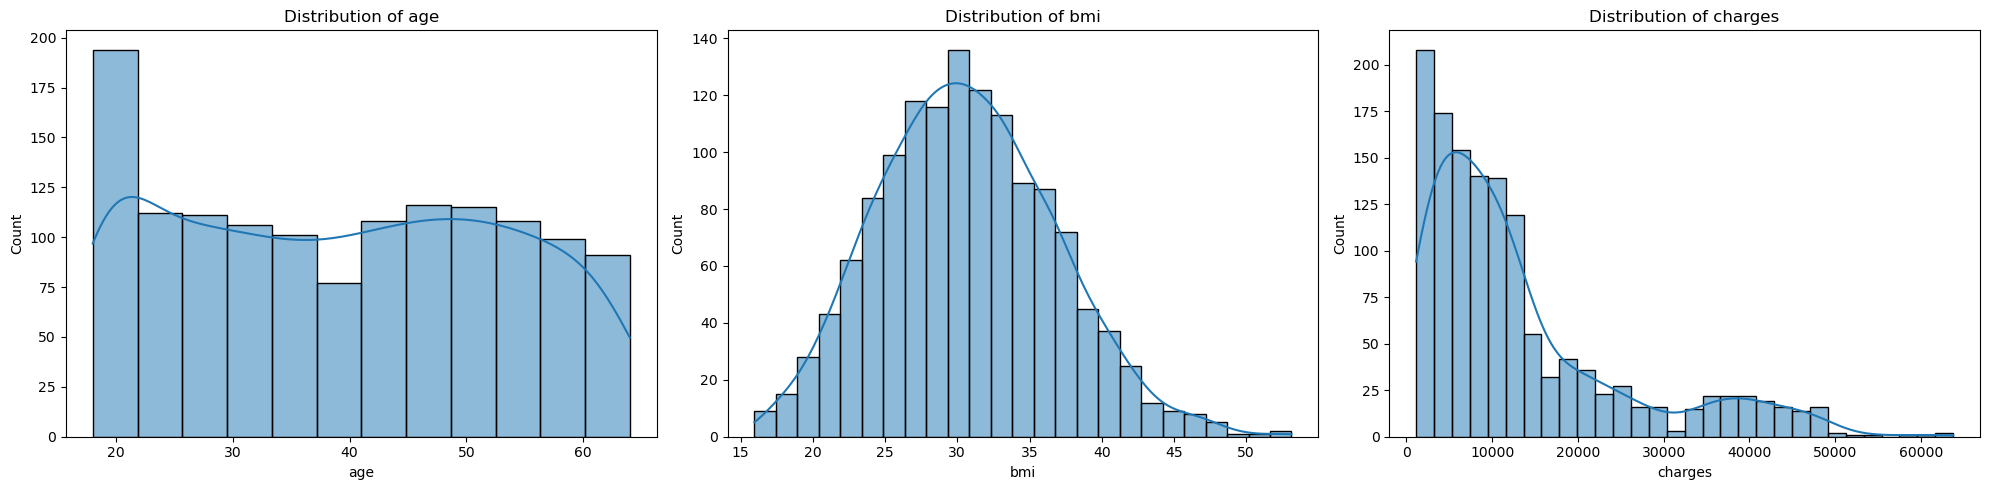

In [4]:
# Histogram for 'age', 'bmi', and 'charges'
plt.figure(figsize=(20, 5))
features = ['age', 'bmi', 'charges']
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [5]:
df[features].value_counts()

age  bmi     charges    
19   30.590  1639.56310     2
18   15.960  1694.79640     1
47   36.190  41676.08110    1
48   24.420  21223.67580    1
     22.800  8269.04400     1
                           ..
31   23.600  4931.64700     1
     21.755  4134.08245     1
     20.400  3260.19900     1
30   44.220  4266.16580     1
64   40.480  13831.11520    1
Length: 1337, dtype: int64

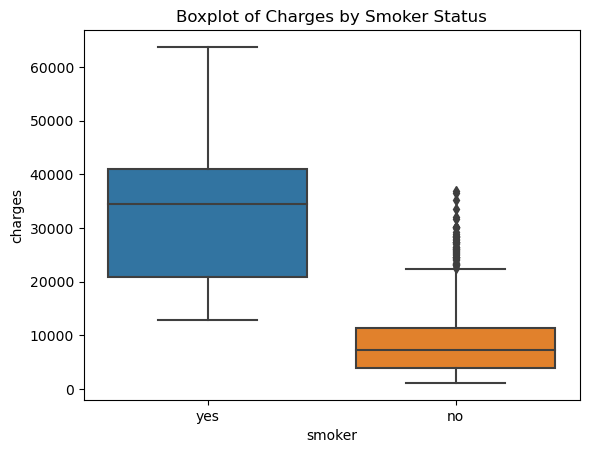

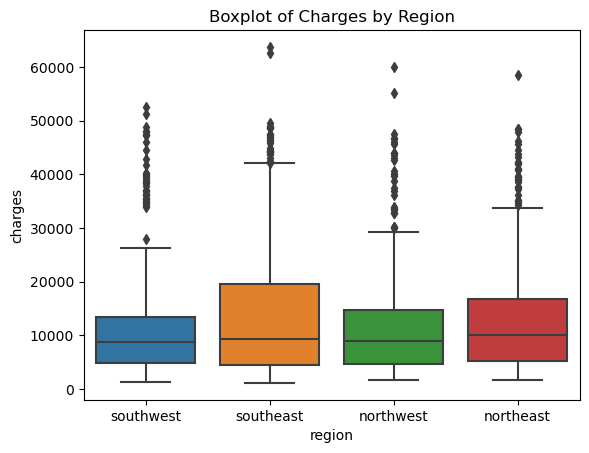

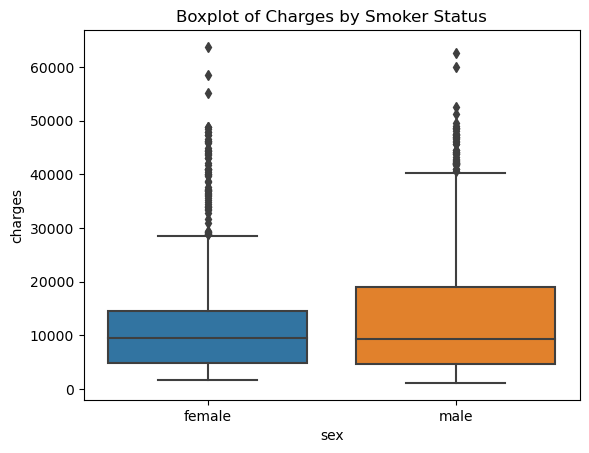

In [6]:
# Box plot for charges across smokers
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Boxplot of Charges by Smoker Status")
plt.show()

# Box plot for charges across regions
sns.boxplot(x='region', y='charges', data=df)
plt.title("Boxplot of Charges by Region")
plt.show()

sns.boxplot(x='sex', y='charges', data=df)
plt.title("Boxplot of Charges by Smoker Status")
plt.show()

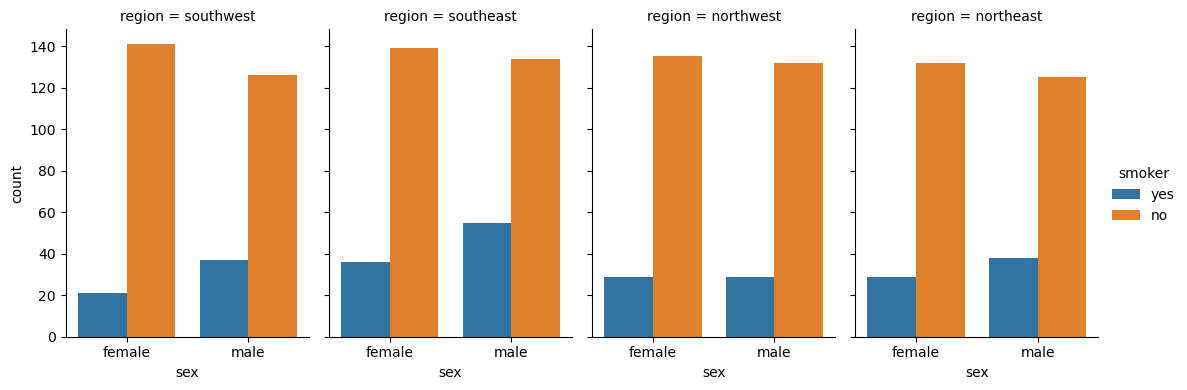

In [7]:
sns.catplot(x="sex", kind="count", hue="smoker", col="region", data=df, height=4, aspect=0.7)
plt.show()

/var/folders/8q/jzwt9rrs4bz6txvcy6scnyn80000gn/T/ipykernel_21568/946326448.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


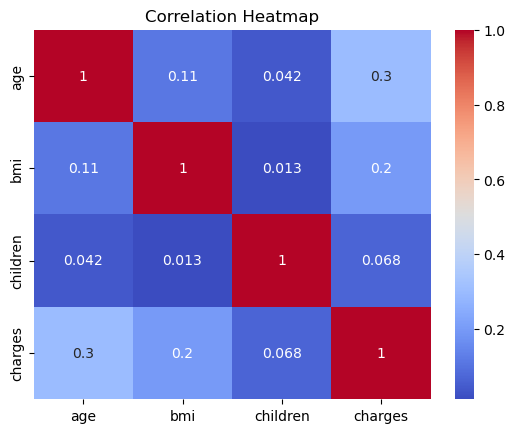

In [8]:
# Correlation heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

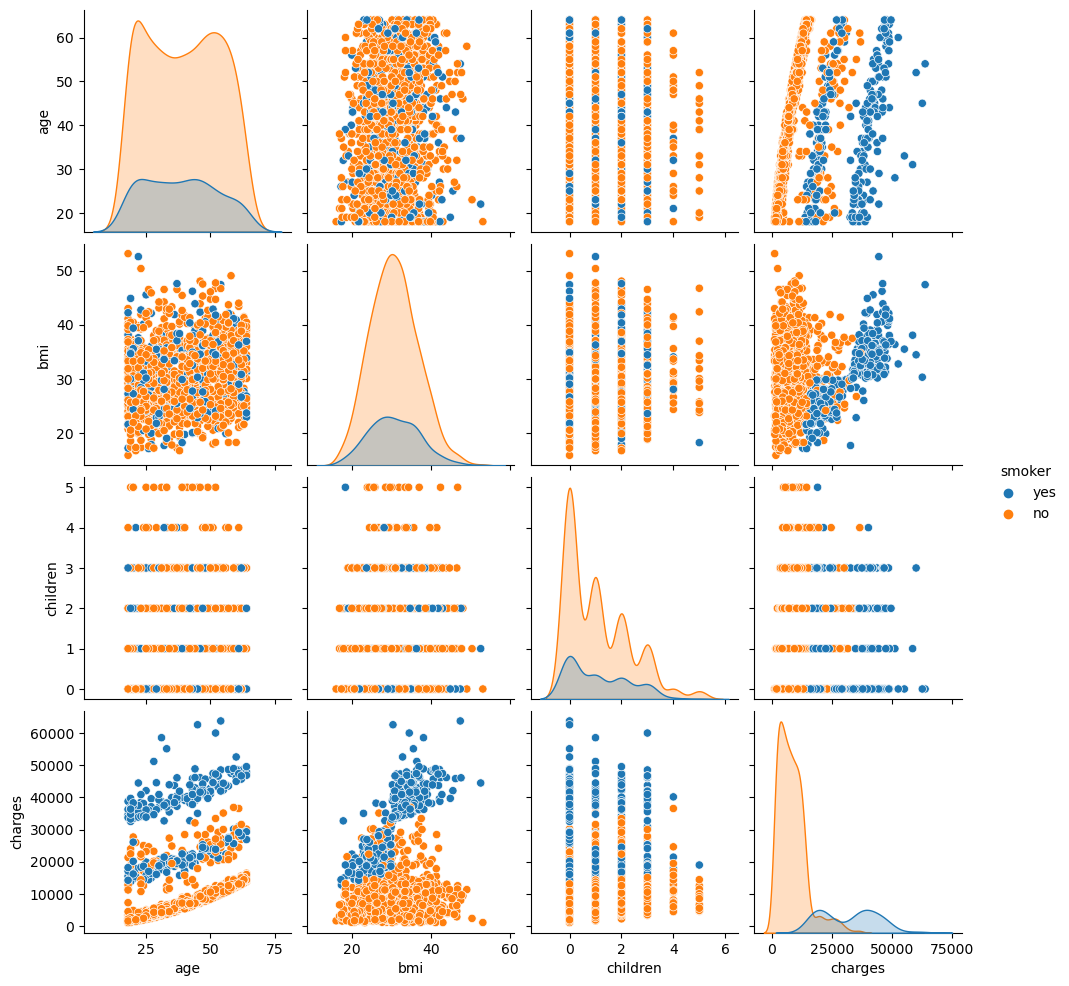

In [9]:
# Pair plots of numerical columns with hue as 'smoker' 
sns.pairplot(df, hue='smoker')
plt.show()

Some key observations based on Exploratory Data Analysis plots:
- The distribution of age seems fairly uniform, with no specific age range dominating the dataset.
- As age increases, medical charges tend to increase as well, especially for smokers. There's a clearer trend of increasing charges with age for smokers than for non-smokers.
- Both smokers and non-smokers are spread across the BMI range for all ages.
- The BMI distribution looks approximately normal, with a peak around the 30 mark. This suggests that many beneficiaries are borderline or classified as overweight.
- For non-smokers, the charges do not show a significant increase with BMI. However, for smokers, as BMI increases, especially beyond the 30 mark, there's a noticeable increase in charges. This suggests that smokers with a high BMI tend to incur higher medical expenses.
- A large number of beneficiaries have fewer children, with most having 0 to 2 children. The number of beneficiaries decreases as the number of children increases.
- The distribution of charges is right-skewed, indicating that a large number of beneficiaries have lower medical expenses, while a smaller number have very high charges.
- Smokers consistently have higher medical charges compared to non-smokers. There are two clear clusters: one for non-smokers with lower charges and one for smokers with notably higher charges.


In [10]:
# Crosstab between 'smoker' and 'sex'
print(pd.crosstab(df['smoker'], df['sex']))

# Grouped mean analysis
print(df.groupby(['sex', 'smoker'])['charges'].mean())

sex     female  male
smoker              
no         547   517
yes        115   159
sex     smoker
female  no         8762.297300
        yes       30678.996276
male    no         8087.204731
        yes       33042.005975
Name: charges, dtype: float64


## Hypothesis testing

In [11]:
import scipy.stats as stats

def t_test_two_samples(data, group_col, value_col):
    group1 = data[data[group_col] == data[group_col].unique()[0]][value_col]
    group2 = data[data[group_col] == data[group_col].unique()[1]][value_col]
    
    t_stat, p_val = stats.ttest_ind(group1, group2)
    return t_stat, p_val

def anova_test(data, group_col, value_col):
    groups = [data[value_col][data[group_col] == group] for group in data[group_col].unique()]
    f_stat, p_val = stats.f_oneway(*groups)
    return f_stat, p_val

def pearson_correlation(data, col1, col2):
    correlation, p_val = stats.pearsonr(data[col1], data[col2])
    return correlation, p_val

def chi_square_test(data, col1, col2):
    contingency = pd.crosstab(data[col1], data[col2])
    chi2, p_val, _, _ = stats.chi2_contingency(contingency)
    return chi2, p_val


# Run Tests
alpha = 0.05

# 1. Difference in Charges Between Smokers and Non-Smokers
t_stat, p_val = t_test_two_samples(df, 'smoker', 'charges')
print(f"1. Difference in Charges Between Smokers and Non-Smokers: t = {t_stat:.3f}, p = {p_val:.3f}")
print("Significant" if p_val < alpha else "Not Significant")
print()

# 2. Difference in Charges Based on Gender
t_stat, p_val = t_test_two_samples(df, 'sex', 'charges')
print(f"2. Difference in Charges Based on Gender: t = {t_stat:.3f}, p = {p_val:.3f}")
print("Significant" if p_val < alpha else "Not Significant")
print()

# 3. Difference in Charges Across Different Regions
f_stat, p_val = anova_test(df, 'region', 'charges')
print(f"3. Difference in Charges Across Different Regions: F = {f_stat:.3f}, p = {p_val:.3f}")
print("Significant" if p_val < alpha else "Not Significant")
print()

# 4. Relationship Between Age and Charges
correlation, p_val = pearson_correlation(df, 'age', 'charges')
print(f"4. Relationship Between Age and Charges: r = {correlation:.3f}, p = {p_val:.3f}")
print("Significant" if p_val < alpha else "Not Significant")
print()

# 5. Difference in BMI Between Smokers and Non-Smokers
t_stat, p_val = t_test_two_samples(df, 'smoker', 'bmi')
print(f"5. Difference in BMI Between Smokers and Non-Smokers: t = {t_stat:.3f}, p = {p_val:.3f}")
print("Significant" if p_val < alpha else "Not Significant")
print()

# 6. Smoking Habits Across Genders
chi2, p_val = chi_square_test(df, 'sex', 'smoker')
print(f"6. Smoking Habits Across Genders: Chi2 = {chi2:.3f}, p = {p_val:.3f}")
print("Significant" if p_val < alpha else "Not Significant")
print()

# 7. Association Between Number of Children and Smoking Habits
chi2, p_val = chi_square_test(df, 'children', 'smoker')
print(f"7. Association Between Number of Children and Smoking Habits: Chi2 = {chi2:.3f}, p = {p_val:.3f}")
print("Significant" if p_val < alpha else "Not Significant")
print()


1. Difference in Charges Between Smokers and Non-Smokers: t = 46.665, p = 0.000
Significant

2. Difference in Charges Based on Gender: t = -2.098, p = 0.036
Significant

3. Difference in Charges Across Different Regions: F = 2.970, p = 0.031
Significant

4. Relationship Between Age and Charges: r = 0.299, p = 0.000
Significant

5. Difference in BMI Between Smokers and Non-Smokers: t = 0.137, p = 0.891
Not Significant

6. Smoking Habits Across Genders: Chi2 = 7.393, p = 0.007
Significant

7. Association Between Number of Children and Smoking Habits: Chi2 = 6.888, p = 0.229
Not Significant



**1. Difference in Charges Between Smokers and Non-Smokers**
- **Hypothesis**:
  - **H0**: There's no difference in charges between smokers and non-smokers.
  - **H1**: There's a significant difference in charges between smokers and non-smokers.
- **Test Used**: Two-sample t-test
- **Result**: t = 46.665, p = 0.000
- **Interpretation**: We reject the null hypothesis (H0) as the p-value is less than 0.05. This indicates that there is a statistically significant difference in charges between smokers and non-smokers.

---

**2. Difference in Charges Based on Gender**
- **Hypothesis**:
  - **H0**: There's no difference in charges between males and females.
  - **H1**: There's a significant difference in charges between males and females.
- **Test Used**: Two-sample t-test
- **Result**: t = -2.098, p = 0.036
- **Interpretation**: We reject the null hypothesis (H0) as the p-value is less than 0.05. This suggests that there is a statistically significant difference in charges based on gender.

---

**3. Difference in Charges Across Different Regions**
- **Hypothesis**:
  - **H0**: There's no difference in charges across different regions.
  - **H1**: At least one region has a different average charge than the others.
- **Test Used**: One-way ANOVA
- **Result**: F = 2.970, p = 0.031
- **Interpretation**: We reject the null hypothesis (H0) since the p-value is less than 0.05, indicating that there's a significant difference in charges across the regions.

---

**4. Relationship Between Age and Charges**
- **Hypothesis**:
  - **H0**: Age does not have any effect on charges.
  - **H1**: Age does have an effect on charges.
- **Test Used**: Pearson correlation test
- **Result**: r = 0.299, p = 0.000
- **Interpretation**: We reject the null hypothesis (H0) as the p-value is less than 0.05. The positive correlation indicates that as age increases, the charges also tend to increase.

---

**5. Difference in BMI Between Smokers and Non-Smokers**
- **Hypothesis**:
  - **H0**: There's no difference in BMI between smokers and non-smokers.
  - **H1**: There's a significant difference in BMI between smokers and non-smokers.
- **Test Used**: Two-sample t-test
- **Result**: t = 0.137, p = 0.891
- **Interpretation**: We fail to reject the null hypothesis (H0) as the p-value is greater than 0.05, suggesting that there's no significant difference in BMI between smokers and non-smokers.

---

**6. Smoking Habits Across Genders**
- **Hypothesis**:
  - **H0**: The proportion of smokers is the same between males and females.
  - **H1**: The proportion of smokers is different between males and females.
- **Test Used**: Chi-squared test for independence
- **Result**: Chi2 = 7.393, p = 0.007
- **Interpretation**: We reject the null hypothesis (H0) since the p-value is less than 0.05, suggesting that the proportion of smokers differs between males and females.

---

**7. Association Between Number of Children and Smoking Habits**
- **Hypothesis**:
  - **H0**: The number of children a person has is independent of their smoking habits.
  - **H1**: The number of children a person has is associated with their smoking habits.
- **Test Used**: Chi-squared test for independence
- **Result**: Chi2 = 6.888, p = 0.229
- **Interpretation**: We fail to reject the null hypothesis (H0) as the p-value is greater than 0.05, suggesting that the number of children a person has is not significantly associated with their smoking habits.



# check for multicollinearity

## heat map

## VIF

no serious multicollinearity detected

In [12]:
y, X = dmatrices('charges ~ sex + smoker + age + bmi + children', data=df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor       features
0   32.863734      Intercept
1    1.008878    sex[T.male]
2    1.006457  smoker[T.yes]
3    1.015129            age
4    1.014578            bmi
5    1.002242       children


The VIF values for all independent variables were below 10, indicating that multicollinearity is not a significant concern in our dataset. Lower VIF values suggest that the variance in the estimated coefficients is not substantially inflated due to multicollinearity.

# fit initial mdoel (full model)

In [48]:
model = smf.ols('charges ~ age + C(sex) + bmi + children + C(smoker) + C(region)',data=df).fit()

In [49]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(sex),5.716429e+06,1.0,0.155553,6.933475e-01
C(smoker),1.224468e+11,1.0,3331.968045,0.000000e+00
C(region),2.334312e+08,3.0,2.117343,9.622108e-02
age,1.712447e+10,1.0,465.983684,7.783217e-89
bmi,5.169225e+09,1.0,140.662697,6.498194e-31
children,4.375466e+08,1.0,11.906327,5.769682e-04
Residual,4.883953e+10,1329.0,NaN,NaN


In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:51:11   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
C(sex)[T.male]          -131.3144    332.945     -0.394      0.693    -784.470     521.842
C(smoker)[T.yes]        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
C(region)[T.northwest]  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
C(region)[T.southeast] -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
C(region)[T.southwest]  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
age                      256.8564     11.899     21.587      0.000     233.514     280.199
bmi                      339.1935     28.599     11.860      0.000     283.088     395.298
children                 475.5005    137.804      3.451      0.001     205.163     745.838
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adj-R^2 Analysis

Goodness of Fit: An adj-R^2 of 0.749 is relatively high, indicating that the model does a good job of explaining the variance in age, sex, BMI, smoker and region. In other words, approximately 74.9% of the variance in the predictors can be accounted for by the independent variables included in the model.

Predictive Power: A higher adj-R^2 generally suggests that the model has better predictive power. This means that this model can make reasonably accurate predictions of charge based on the values of the age, sex, BMI, smoker and region.

### T-test analysis

Looking at the model summary we can conclude that sex[T.male] and region[T.northwest] do not have a significant impact on charge with respect to the other predictors in the model. Since the p values for these 2 predictors are greater than 0.05 we can reject the null hypothesis that these predictors have a significant impact on charge. 

# model problem diagnosis

## Influential Points

In [15]:
#object for the analysis of influential points
infl = model.get_influence()
#members
print(dir(infl))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_drop_vari', '_ols_xnoti', '_plot_index', '_res_looo', 'aux_regression_endog', 'aux_regression_exog', 'cooks_distance', 'cov_ratio', 'det_cov_params_not_obsi', 'dfbeta', 'dfbetas', 'dffits', 'dffits_internal', 'endog', 'ess_press', 'exog', 'get_resid_studentized_external', 'hat_diag_factor', 'hat_matrix_diag', 'influence', 'k_vars', 'model_class', 'nobs', 'params_not_obsi', 'plot_index', 'plot_influence', 'resid', 'resid_press', 'resid_std', 'resid_studentized', 'resid_studentized_external', 'resid_studentized_internal', 'resid_var', 'results', 'scale', 'sigma2_not_obsi', 'summary_frame', 'summary_table']


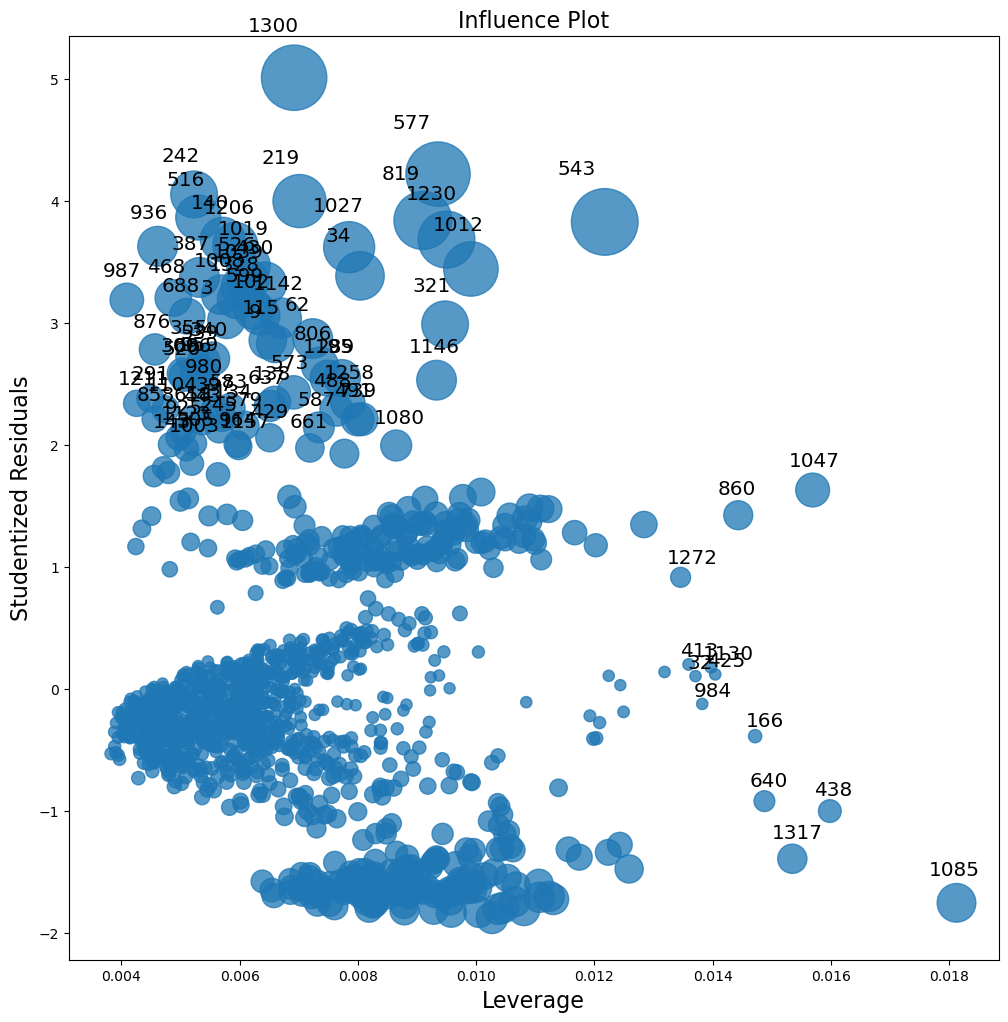

In [16]:
#graphical representation of the influences()
fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(model,ax=ax, criterion="cooks") 
#size of points are given by cook's dist value

In [17]:
#threshold externally studentized residuals
n=len(df)
p=5
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
#detection - absolute value > threshold
reg_studs=infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud
#which ones?
print(df.index[atyp_stud],reg_studs[atyp_stud])

Int64Index([   3,    9,   34,   62,  102,  115,  138,  140,  143,  219,  242,
             245,  289,  291,  305,  306,  321,  340,  355,  379,  387,  397,
             429,  430,  443,  468,  488,  491,  516,  520,  526,  539,  543,
             573,  577,  583,  587,  599,  637,  658,  661,  688,  696,  739,
             806,  819,  858,  876,  925,  936,  959,  964,  980,  987, 1003,
            1008, 1012, 1019, 1027, 1039, 1080, 1104, 1123, 1134, 1142, 1146,
            1157, 1195, 1206, 1211, 1230, 1258, 1300, 1328],
           dtype='int64') [3.02510552 2.82739106 3.38569378 2.87148392 3.06200413 2.85738389
 2.35074494 3.68275676 2.00227106 3.99832561 4.05322772 2.12797915
 2.5488738  2.3799053  2.01263471 2.58628619 2.98837083 2.70730194
 2.72820592 2.15966153 3.37235263 2.28240075 2.05851874 3.32320791
 2.19375973 3.20440739 2.28861723 2.20788582 3.86387797 2.56408758
 3.3459419  2.68646424 3.82759062 2.43039752 4.21980003 2.30054981
 2.14388505 3.10907589 2.31931267 2.2104817

In [18]:
#Cook's distance
inflsum=infl.summary_frame()
reg_cook=inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n
print(df.index[atyp_cook],reg_cook[atyp_cook])

Int64Index([   3,    9,   34,   62,   69,   98,   99,  102,  115,  138,  140,
             219,  235,  242,  250,  266,  289,  301,  306,  321,  340,  355,
             379,  380,  387,  397,  411,  412,  429,  430,  468,  488,  491,
             494,  516,  520,  526,  539,  543,  573,  577,  583,  587,  599,
             637,  661,  688,  696,  730,  739,  770,  793,  806,  819,  854,
             860,  876,  896,  936,  959,  980,  987,  989,  994, 1008, 1011,
            1012, 1019, 1027, 1039, 1047, 1080, 1085, 1100, 1134, 1142, 1146,
            1195, 1206, 1230, 1258, 1300, 1306, 1307, 1314, 1317, 1328],
           dtype='int64') 3       0.005871
9       0.005871
34      0.010236
62      0.006641
69      0.002991
          ...   
1306    0.003067
1307    0.003160
1314    0.002992
1317    0.003358
1328    0.006764
Name: cooks_d, Length: 87, dtype: float64


In [19]:
#external t
studentized = df.index[atyp_stud]
studentized

Int64Index([   3,    9,   34,   62,  102,  115,  138,  140,  143,  219,  242,
             245,  289,  291,  305,  306,  321,  340,  355,  379,  387,  397,
             429,  430,  443,  468,  488,  491,  516,  520,  526,  539,  543,
             573,  577,  583,  587,  599,  637,  658,  661,  688,  696,  739,
             806,  819,  858,  876,  925,  936,  959,  964,  980,  987, 1003,
            1008, 1012, 1019, 1027, 1039, 1080, 1104, 1123, 1134, 1142, 1146,
            1157, 1195, 1206, 1211, 1230, 1258, 1300, 1328],
           dtype='int64')

In [20]:
cooks = df.index[atyp_cook]
cooks

Int64Index([   3,    9,   34,   62,   69,   98,   99,  102,  115,  138,  140,
             219,  235,  242,  250,  266,  289,  301,  306,  321,  340,  355,
             379,  380,  387,  397,  411,  412,  429,  430,  468,  488,  491,
             494,  516,  520,  526,  539,  543,  573,  577,  583,  587,  599,
             637,  661,  688,  696,  730,  739,  770,  793,  806,  819,  854,
             860,  876,  896,  936,  959,  980,  987,  989,  994, 1008, 1011,
            1012, 1019, 1027, 1039, 1047, 1080, 1085, 1100, 1134, 1142, 1146,
            1195, 1206, 1230, 1258, 1300, 1306, 1307, 1314, 1317, 1328],
           dtype='int64')

### calculating h

In [21]:
def convert_to_binary(input_array):
    # Dictionary to map "yes" to 1 and "no" to 0
    conversion_dict = {"yes": 1, "no": 0}
    # Using list comprehension to convert array elements to binary
    binary_array = [conversion_dict[element] for element in input_array]
    return binary_array

In [22]:
smoker_binary = convert_to_binary(df['smoker'])

In [23]:
ones = np.ones(len(df))
x1 = smoker_binary
x2 = df['age']
x3 = df['bmi'].astype('i')
x4 = df['children']
x = np.column_stack((ones, x1, x2, x3, x4))
x

array([[ 1.,  1., 19., 27.,  0.],
       [ 1.,  0., 18., 33.,  1.],
       [ 1.,  0., 28., 33.,  3.],
       ...,
       [ 1.,  0., 18., 36.,  0.],
       [ 1.,  0., 21., 25.,  0.],
       [ 1.,  1., 61., 29.,  0.]])

In [24]:
h = x @ np.linalg.inv(x.T @ x) @ x.T
h

array([[ 0.00575372,  0.00141501, -0.00035521, ...,  0.00181529,
         0.002102  ,  0.00272806],
       [ 0.00141501,  0.0029729 ,  0.0021083 , ...,  0.00321483,
         0.00210546, -0.00198785],
       [-0.00035521,  0.0021083 ,  0.00361642, ...,  0.00130488,
         0.0004191 , -0.00232166],
       ...,
       [ 0.00181529,  0.00321483,  0.00130488, ...,  0.00415829,
         0.00237172, -0.00150707],
       [ 0.002102  ,  0.00210546,  0.0004191 , ...,  0.00237172,
         0.00312795, -0.00074612],
       [ 0.00272806, -0.00198785, -0.00232166, ..., -0.00150707,
        -0.00074612,  0.0064025 ]])

### finding high-leverage hii

In [25]:
def find_high_leverage_pts(matrix, p, n):
    positions = []
    for i, row in enumerate(matrix):
        for j, value in enumerate(row):
            if value > 2*p/n:
                positions.append((i, j))
    return positions

# Find positions of values greater than 10 in the matrix
positions = find_high_leverage_pts(h, 5, 1338)

In [26]:
hii = set()
for i in positions:
    hii.add(i[0])

### Cook's Distance, External Studentized Residuals and High Leverage Analysis

1. Understanding Cook's Distance, External Studentized Residuals and Leverage:

Cook's Distance measures the influence of each data point on the regression coefficients and the overall fit of the model. High Cook's Distance values indicate that a data point has a substantial impact on the model when included or excluded.    

External Studentized Residuals are standardized residuals that measure how far each observed data point deviates from the predicted value. High external studentized residuals suggest that a data point has an unusual or extreme effect on the model.

Leverage measures the potential impact of each data point on the estimated coefficients of the regression model. Data points with high leverage have extreme values for one or more predictor variables and can "pull" the regression line towards them.

2. Identification of Outliers and Influential Points:

High values of Cook's Distance, external studentized residuals and leverage indicate potential outliers or influential data points. Outliers are data points that deviate significantly from the overall pattern of the data while influential points are data points that have a strong impact on the regression coefficients. Removing these points is the best course of action so all points that failed the Cook's Distance, External Studentized Residuals and Leverage tests will be removed

### points detected by all 3 methods of influential points detection

In [27]:
studentized_cooks = list(set(studentized).intersection(set(cooks)))
outliers = list(set(studentized_cooks).intersection(hii))
outliers

[577, 321, 1012, 543]

In [28]:
df_clean_union = df.drop(outliers)
model_clean = smf.ols('charges ~ smoker + age + bmi + children', data=df_clean_union).fit()

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

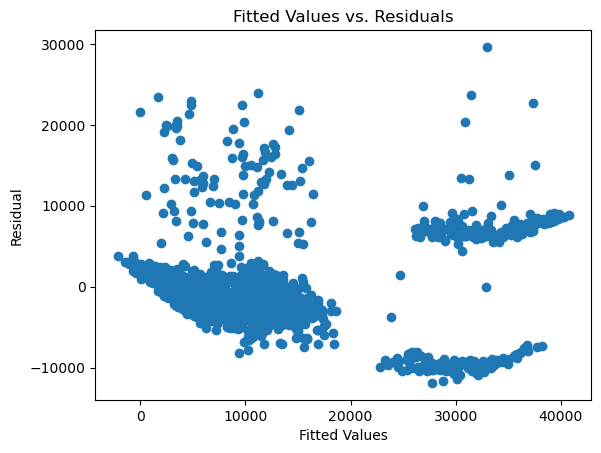

In [29]:
p = model_clean.fittedvalues
res = model_clean.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

### points detected by any of the 3 methods of influential points detection
after discussion with Shan because there are still many outliers

In [30]:
studentized_cooks = list(set(studentized).union(set(cooks)))
outliers_union = list(set(studentized_cooks).union(hii))
len(outliers_union)

235

### removing outliers

In [31]:
df_clean_union = df.drop(outliers_union)
model_clean_union = smf.ols('charges ~ smoker + age + bmi + children', data=df_clean_union).fit()

## new summary without influential points
adj R^2, AIC, BIC looking better

In [32]:
model_clean_union.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1744.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:51:17   Log-Likelihood:                -10694.
No. Observations:                1103   AIC:                         2.140e+04
Df Residuals:                    1098   BIC:                         2.142e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.078e+04    714.646    -15.089      0.000   -1.22e+04   -9380.947
smoker[T.yes]  2.457e+04    320.618     76.619      0.000    2.39e+04    2.52e+04
age             270.2878      8.725     30.979      0.000     253.168     287.407
bmi             228.7190     22.457     10.185      0.000     184.656     272.782
children        541.0878    114.260      4.736      0.000     316.895     765.280
==============================================================================
Omnibus:                       52.332   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.602
Skew:                          -0.144   Prob(JB):                     4.42e-34
Kurtosis:                       4.805   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comparing this new clean model without influential points it becomes immediately clear that this model fits the data far better than the previous model. Firstly, adj-R^2 jumped up to 0.863 which indicates that 86.3% of the variance in data is now explored by this new model. This indicates that the influential points caused great variance in the original model and without them our model is able to much more accuratley reflect the data. Similarly, the type and number of predictors was reworked as to remove the predictors that were not significant to the model which improves our model since it should only contain predictors that have influence on the charge with respect to the other predictors. Removing insignificant predictors is an integral part of model diagnosis and so removing them was the bets course of action. 

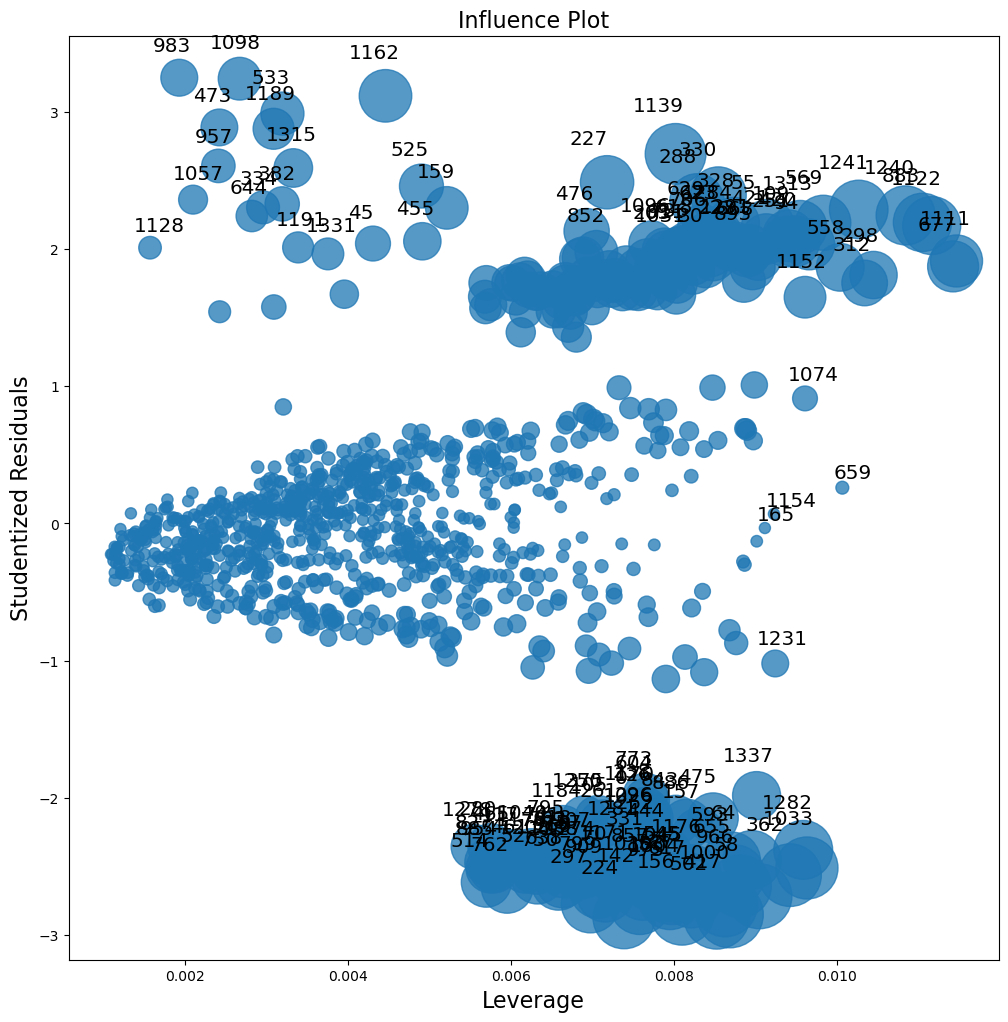

In [33]:
#graphical representation of the influences()
fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(model_clean_union,ax=ax, criterion="cooks") 
#size of points are given by cook's dist value

## heteroscedasticity
seems to have heteroscedasticity

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

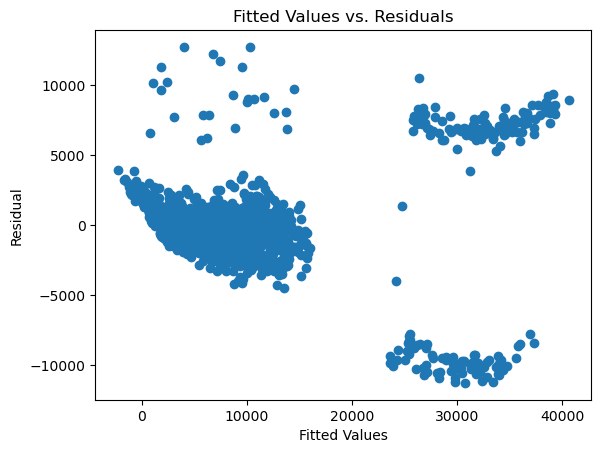

In [34]:
p = model_clean_union.fittedvalues
res = model_clean_union.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [35]:
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 121.74360137568897, 'LM-Test p-value': 1.446717553918781e-22}


### Background:
In MLR, one of the assumptions is that the variance of the residuals (the differences between observed and predicted values) should be constant across all levels of the independent variables. When this assumption is violated, and the variance of residuals systematically changes with the values of the predictors, it indicates the presence of heteroscedasticity. We detected heteroscedasticity through several diagnostic methods, including:

Residual Plot: A visual inspection of the residual plot revealed a funnel-shaped pattern, which is a common visual indicator of heteroscedasticity. The spread of residuals appeared to increase or decrease as the predictor values changed.

Breusch-Pagan Test: We conducted the Breusch-Pagan test, a statistical test for heteroscedasticity. The test resulted in a p-value less than 0.05, indicating evidence of heteroscedasticity.

### Implications:
Heteroscedasticity can have several important implications for our MLR model and its results:

Inefficient Parameter Estimates: When heteroscedasticity is present, the ordinary least squares (OLS) estimates of the model coefficients remain unbiased but are no longer efficient. This means that while the parameter estimates are still unbiased, their standard errors are incorrect, leading to invalid hypothesis tests and confidence intervals.

Incorrect Inference: Confidence intervals may be too wide or too narrow, leading to incorrect inferences about the significance of predictors.

Invalid Hypothesis Testing: Hypothesis tests (e.g., t-tests) for individual coefficients may lead to incorrect conclusions about the importance of predictors.

Misleading Predictions: Prediction intervals may not provide accurate estimates of the uncertainty in our predictions.

Mitigation Strategies:
To address the issue of heteroscedasticity, we can consider the following strategies:

Data Transformation: Applying transformations to the dependent variable or one or more predictor variables may help stabilize the variance and mitigate heteroscedasticity.

One of the best ways to mitigate the effects of heteroscedasticity is applying a linear transformation on the dependatn variable, in this case charge, which will help stabalize the variance and the most effective transformation is the natural log transformation on the dependant variable

In [36]:
df_clean_union['charges_ln'] = np.log(df_clean_union['charges'])

## check normality of residuals


In [37]:
kstest(model.resid,'norm')

KstestResult(statistic=0.6263077931301486, pvalue=0.0, statistic_location=-5.151592484092362, statistic_sign=1)

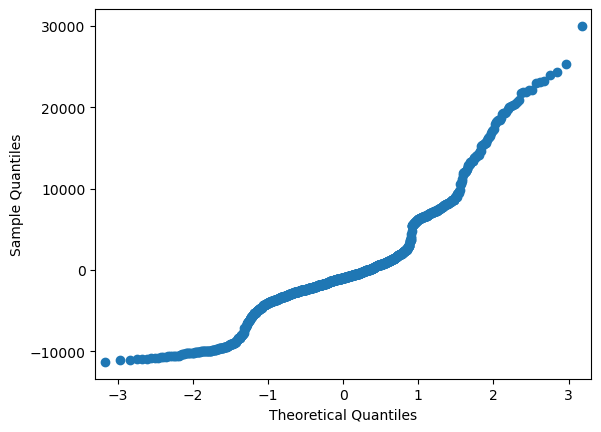

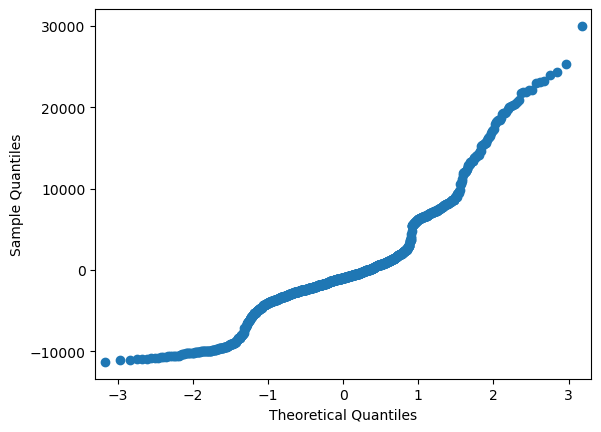

In [38]:
sm.qqplot(model.resid)

(array([126., 185., 664., 121., 156.,  31.,  26.,  17.,  11.,   1.]),
 array([-11304.90666616,  -7175.13955782,  -3045.37244948,   1084.39465886,
          5214.1617672 ,   9343.92887554,  13473.69598388,  17603.46309221,
         21733.23020055,  25862.99730889,  29992.76441723]),
 <BarContainer object of 10 artists>)

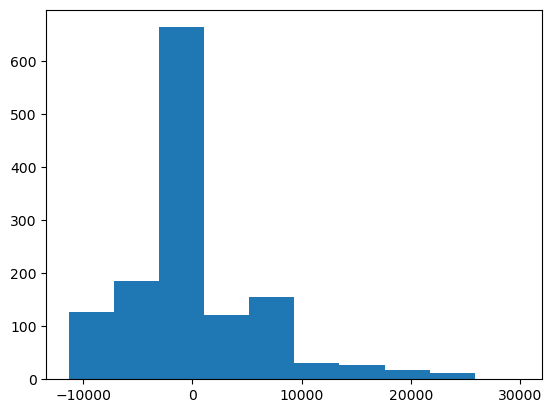

In [39]:
plt.hist(model.resid)

Normality of residuals is a fundamental assumption in linear regression, implying that the residuals should follow a normal distribution. Departures from normality can significantly impact the reliability of model inferences and predictions.

### QQ Plot Analysis:
The QQ plot visually compares the quantiles of the residuals to the quantiles of a theoretical normal distribution. Our QQ plot reveals substantial deviations from the straight-line pattern, particularly in the tails.
The residuals exhibit significant departures from the expected normal distribution behavior.

Interpretation: The QQ plot strongly suggests that the residuals do not adhere to a normal distribution.
The notable deviations in the tails of the plot indicate a violation of the normality assumption.

### Histogram Analysis:
The histogram provides a visual summary of the distribution of residuals. The histogram does not exhibit a symmetrical, bell-shaped distribution typically associated with a normal distribution.
Asymmetry and irregularities in the distribution are apparent.

Interpretation: The histogram of residuals confirms the visual impression from the QQ plot: the distribution deviates from normality.
The lack of a symmetric, bell-shaped pattern indicates a violation of the normality assumption.

### Conclusion:

There is strong evidence to suggest that the residuals do not conform to a normal distribution.
Both the QQ plot and histogram indicate pronounced departures from normality.
The normality assumption is likely violated, which can have significant consequences for the validity of our MLR model.

Again one solution to this is to perform a natural log transformation on charge

## Natual-log transformation
to attempt to remove heteroscedasticity and violation of normality

In [40]:
model_clean_union_ln = smf.ols('charges_ln ~ sex + region + smoker + age + bmi + children', data=df_clean_union).fit()

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

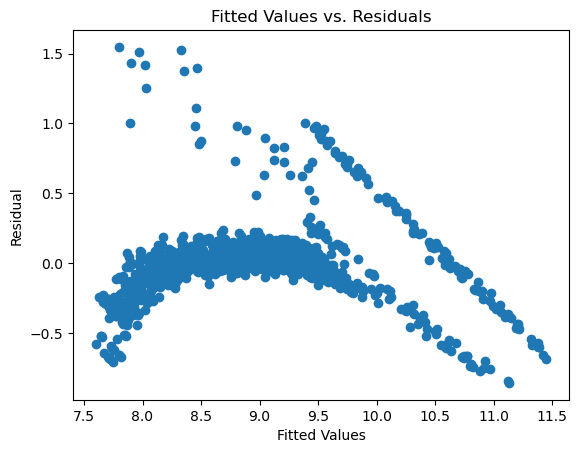

In [41]:
p = model_clean_union_ln.fittedvalues
res = model_clean_union_ln.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [42]:
kstest(model_clean_union_ln.resid,'norm')

KstestResult(statistic=0.33975426793435415, pvalue=4.0261721009673995e-114, statistic_location=0.1914927728352538, statistic_sign=1)

## re-check normality of residuals

still violated

In [43]:
kstest(model_clean_union_ln.resid,'norm')

KstestResult(statistic=0.33975426793435415, pvalue=4.0261721009673995e-114, statistic_location=0.1914927728352538, statistic_sign=1)

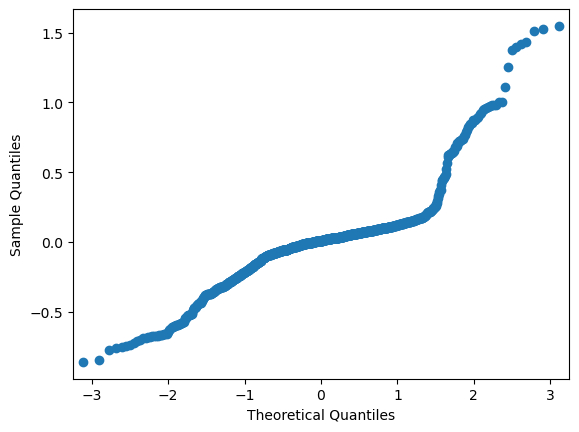

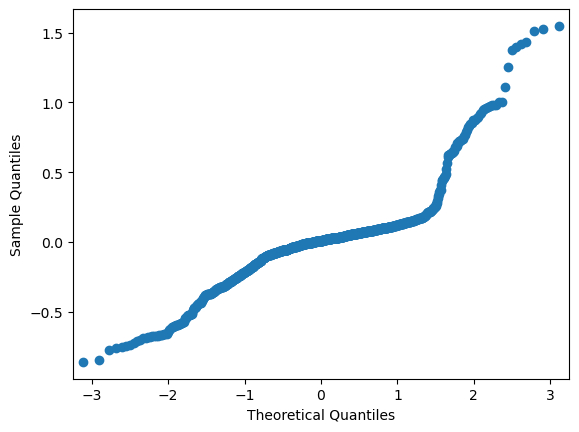

In [44]:
sm.qqplot(model_clean_union_ln.resid)

(array([ 27.,  47., 161., 656., 145.,  13.,  25.,  20.,   2.,   7.]),
 array([-0.85796116, -0.61735885, -0.37675653, -0.13615421,  0.10444811,
         0.34505042,  0.58565274,  0.82625506,  1.06685737,  1.30745969,
         1.54806201]),
 <BarContainer object of 10 artists>)

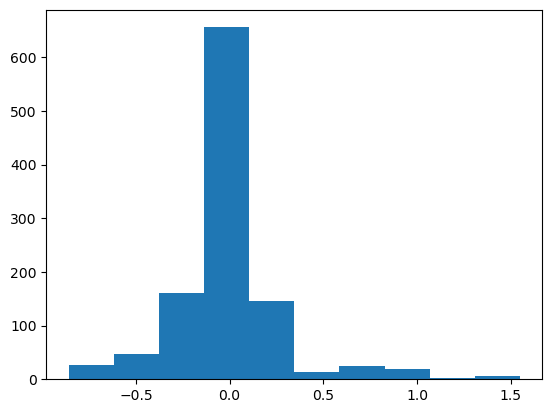

In [45]:
plt.hist(model_clean_union_ln.resid)

# model selection

going with individual t test: all seem to be significant. 
Ordered by p-value desc: ran sequential F test and no 

In [46]:
model_clean_union_ln = smf.ols('charges_ln ~ sex + region + smoker + age + bmi + children', data=df_clean_union).fit()
model_clean_union_ln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             charges_ln   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1092.
Date:                Wed, 11 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:51:19   Log-Likelihood:                -194.78
No. Observations:                1103   AIC:                             407.6
Df Residuals:                    1094   BIC:                             452.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.8908      0.055    125.709      0.000       6.783       6.998
sex[T.male]            -0.0867      0.018     -4.939      0.000      -0.121      -0.052
region[T.northwest]    -0.0871      0.025     -3.509      0.000      -0.136      -0.038
region[T.southeast]    -0.1437      0.026     -5.618      0.000      -0.194      -0.093
region[T.southwest]    -0.1001      0.025     -4.021      0.000      -0.149      -0.051
smoker[T.yes]           1.6730      0.024     70.649      0.000       1.627       1.719
age                     0.0382      0.001     59.418      0.000       0.037       0.039
bmi                     0.0108      0.002      6.286      0.000       0.007       0.014
children                0.1010      0.008     11.995      0.000       0.084       0.117
==============================================================================
Omnibus:                      331.579   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1937.260
Skew:                           1.254   Prob(JB):                         0.00
Kurtosis:                       8.988   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comparing this new transformed model to the previous model which only excluded the influential points, it is clear that there is improvement in the overall accuracy. Adj-R^2 has increased which implies an incraese in the percentage of data explored by the model while keeping only significant variable. 

In [47]:
model_clean_union_ln1 = smf.ols('charges_ln ~ smoker + age + children + bmi + sex +  region', data=df_clean_union).fit()
sm.stats.anova_lm(model_clean_union_ln1, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
smoker,1.0,382.012408,382.012408,4545.822149,0.000000e+00
sex,1.0,3.120448,3.120448,37.132310,1.527125e-09
region,3.0,2.418963,0.806321,9.594953,2.956577e-06
age,1.0,331.230338,331.230338,3941.532201,0.000000e+00
children,1.0,12.223866,12.223866,145.459985,1.545033e-31
bmi,1.0,3.320479,3.320479,39.512610,4.699838e-10
Residual,1094.0,91.935311,0.084036,NaN,NaN
